## 12_SWIETOKRZYSKIE_preprocessed.csv

Plik zawiera wyniki oceny odkurzaczy w jednej z sieci sklepów w wojewódźtwie świętokrzyskm oraz dane kupujących.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../Analysis Data/12_SWIETOKRZYSKIE_preprocessed.csv"); df

,days from purchase,brand,age,sex,rating
0,7,Beko,33.0,M,3.0
1,7,Beko,55.0,NaN,3.0
2,10,Beko,50.0,M,2.0
3,11,Tefal,36.0,M,2.5
4,3,Beko,62.0,K,2.5
...,...,...,...,...,...
461,8,Beko,19.0,M,2.5
462,9,Electrolux,50.0,K,3.0
463,9,Beko,NaN,K,2.0
464,5,Tefal,41.0,M,3.0



### days from purchase
Ilość dni, które minęły od zakupu.

<AxesSubplot:title={'center':'days from purchase'}, ylabel='Frequency'>

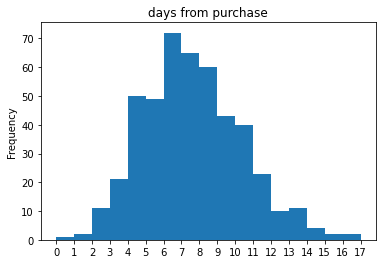

In [90]:
min = df['days from purchase'].min()
max = df['days from purchase'].max()
df['days from purchase'].plot(kind='hist', bins=(max - min), title='days from purchase', xticks=[i for i in range(min, max+1)])

### brand
Marka zakupionego odkurzacza.


<ipython-input-79-2a898a7b1bde>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


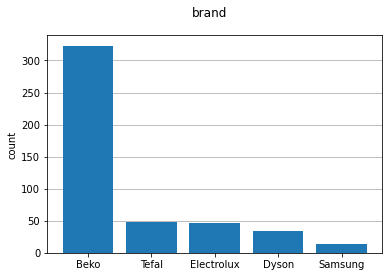

In [79]:
D = df['brand'].value_counts().to_dict()
fig, ax = plt.subplots()
ax.bar(*zip(*D.items()))
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('count')
fig.suptitle('brand')
fig.show()

### age
Wiek kupującego w latach.


In [92]:
min = df['age'].min()
max = df['age'].max()
df['age'].plot(kind='hist', bins=(max - min), title='age', xticks=[i for i in range(min, max+1)])

TypeError: 'float' object cannot be interpreted as an integer

### sex
Płeć kupującego.
* K - kobieta
* M - mężczyzna

<ipython-input-80-f93ad710a7ba>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


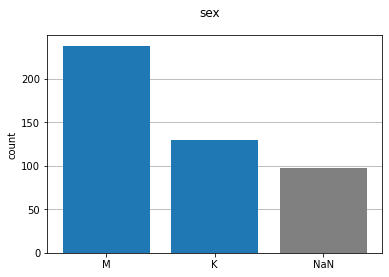

In [80]:
D = df['sex'].value_counts().to_dict()
fig, ax = plt.subplots()
ax.bar(*zip(*D.items()))
ax.bar(['NaN'], [df.sex.isna().sum()], color='gray')
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('count')
fig.suptitle('sex')
fig.show()

### rating
Ocena zakupu w skali od 0 do 5 z różnicą co 0.5.

<AxesSubplot:title={'center':'rating'}, ylabel='Frequency'>

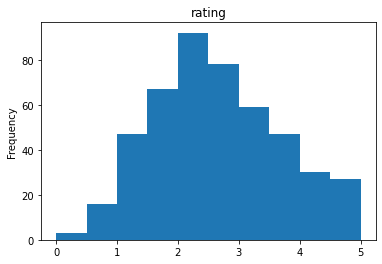

In [101]:
df['rating'].plot(kind='hist', bins=10, title='rating')